<a href="https://colab.research.google.com/github/leehw10/test/blob/master/g_11_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

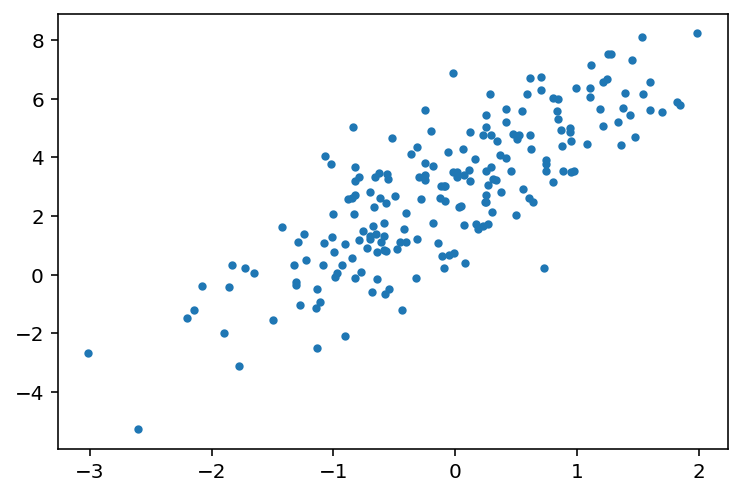

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 추가
y = w*x + b + np.random.randn(n_samples)*1.5
plt.scatter(x,y, s=10)

In [9]:
np.corrcoef(x,y)

array([[1.        , 0.81321331],
       [0.81321331, 1.        ]])

In [22]:
t = np.arange(12)
t.reshape(3,4)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()   # 생성자 , constructor, 객체, 모델 생성
leg.fit(x.reshape(-1,1), y)  # 학습, GD 최적화기 사용, MSE, reshape(-1,1) : 1차원을 2차원으로 보이도록 설정
print(leg.coef_)
print(leg.intercept_)

[2.04734989]
2.9137809835936466


## 모델을 예측에 사용하기

In [35]:
leg.predict([[1],[5],[10]])

array([ 4.00094251,  9.77652497, 16.99600304])

## 경사하강법 구현

변수가 1개인 경우
--

In [56]:
num_epoch = 10
lr = 1.0     # learning rate, 너무 크면 발산함

w = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w:.6f}, b = {b:.6f} , error = {error:.6f}")

    w = w - lr*((y_pred - y)* x).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.278722, b = 0.656647 , error = 4.162999
 1 w1 = -0.365855, b = 3.787357 , error = 3.192193
 2 w1 = -0.184969, b = 3.732955 , error = 3.196678
 3 w1 = -0.166171, b = 3.748222 , error = 3.199108
 4 w1 = -0.162452, b = 3.749808 , error = 3.199474
 5 w1 = -0.161838, b = 3.750122 , error = 3.199539
 6 w1 = -0.161732, b = 3.750174 , error = 3.199550
 7 w1 = -0.161714, b = 3.750183 , error = 3.199552
 8 w1 = -0.161710, b = 3.750185 , error = 3.199552
 9 w1 = -0.161710, b = 3.750185 , error = 3.199552


변수가 2개인 경우
--

In [50]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1.9910581  3.02545323]
4.005233966700463


In [0]:
leg.score(X,y)

0.9232498694482834

경사하강법
--

In [53]:
num_epoch = 10
lr = 1  

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.082268,  w2 = 0.854378, b = 0.349484 , error = 3.963681
 1 w1 = 1.876926,  w2 = 3.413177, b = 3.785908 , error = 0.874158
 2 w1 = 1.981138,  w2 = 2.944401, b = 4.000706 , error = 0.792706
 3 w1 = 1.992263,  w2 = 3.041759, b = 4.002937 , error = 0.791905
 4 w1 = 1.990601,  w2 = 3.022124, b = 4.005620 , error = 0.791668
 5 w1 = 1.991168,  w2 = 3.026133, b = 4.005135 , error = 0.791714
 6 w1 = 1.991032,  w2 = 3.025314, b = 4.005256 , error = 0.791704
 7 w1 = 1.991064,  w2 = 3.025482, b = 4.005229 , error = 0.791706
 8 w1 = 1.991057,  w2 = 3.025447, b = 4.005235 , error = 0.791706
 9 w1 = 1.991058,  w2 = 3.025454, b = 4.005234 , error = 0.791706
